In [3]:
""""
I have a lot of interest for portfolio management and research in general. 
These last days I was wondering what could be the best portfolio of stocks, considering as the
whole potential market the stocks that compound Brazilian Ibovespa. Yesterday I conducted this exercise, 
downloaded and cleaned the data from YahooFinance, and needed to take out from the scope of possible 
assets 5 stocks which IPO was recent and data available limited. If I had used the whole cohort
of companies in Ibovespa, I would have got a result that is not a nonconvex problem, and in this 
case portfolio theory may not be the best fit. I use PyPortofolioOpt, a library that implements portfolio 
optimisation methods. I will present the portfolios that maximize the Sharpe Ratio, with 
different optimisation approaches on the same data
"""

'"\nI have a lot of interest for portfolio management and research in general. \nThese last days I was wondering what could be the best portfolio of stocks, considering as the\nwhole potential market the stocks that compound Brazilian Ibovespa. Yesterday I conducted this exercise, \ndownloaded and cleaned the data from YahooFinance, and needed to take out from the scope of possible \nassets 5 stocks which IPO was recent and data available limited. If I had used the whole cohort\nof companies in Ibovespa, I would have got a result that is not a nonconvex problem, and in this \ncase portfolio theory may not be the best fit. I use PyPortofolioOpt, a library that implements portfolio \noptimisation methods. I will present the portfolios that maximize the Sharpe Ratio, with \ndifferent optimisation approaches on the same data\n'

In [4]:
# I start by estimating the long-only portfolio that maximises the SR (the risk-free default is 2%)

In [5]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [6]:
df = pd.read_csv("ibov_stocks2.csv", parse_dates=True, index_col="Date")

In [7]:
mu = expected_returns.mean_historical_return(df)
mu

ABEV3     0.131648
B3SA3     0.214699
BBDC3     0.096431
BBDC4     0.092723
BBSE3     0.112565
BEEF3     0.055798
BRML3     0.008950
BTOW3     0.100029
CCRO3     0.069012
CIEL3     0.017847
CMIG4     0.047445
COGN3     0.091671
CSAN3     0.164651
CSNA3     0.042494
CVCB3     0.025676
CYRE3     0.053481
ECOR3     0.035351
EGIE3     0.147743
ELET3     0.073356
ELET6     0.094584
EMBR3    -0.033310
ENBR3     0.107161
ENGI11    0.170846
EQTL3     0.425615
EZTC3     0.220653
FLRY3     0.137303
GGBR4     0.024890
GOAU4    -0.069460
GOLL4    -0.014094
HGTX3     0.143386
HYPE3     0.031751
IGTA3     0.070359
ITSA4     0.094698
ITUB4     0.087559
JBSS3     0.147060
KLBN11    0.108249
LAME4     0.117739
LREN3     0.228292
MRFG3     0.011796
MRVE3     0.071958
MULT3     0.097889
PETR3     0.003449
PETR4     0.015828
PRIO3    -0.098860
QUAL3     0.125465
RADL3     0.301201
RENT3     0.279264
SANB11    0.104500
SBSP3     0.193134
SULA11    0.154943
TAEE11    0.127313
TOTS3     0.001640
UGPA3     0.

In [8]:
mu.plot.barh(figsize=(10,10));

In [9]:
S = risk_models.sample_cov(df)
S

,ABEV3,B3SA3,BBDC3,BBDC4,BBSE3,BEEF3,BRML3,BTOW3,CCRO3,CIEL3,...,TAEE11,TOTS3,UGPA3,USIM5,VALE3,VIVT4,WEGE3,YDUQ3,TIMS3,SUZB3
ABEV3,0.070958,0.002296,0.042130,0.040928,0.000230,0.020843,0.038762,0.035001,0.038143,0.035375,...,0.001203,0.025475,0.004223,0.040436,0.030597,0.022237,0.029354,0.002739,0.000905,-0.001239
B3SA3,0.002296,0.132940,0.003723,0.003475,0.005505,0.001868,0.001951,0.004724,0.004827,0.006015,...,0.001343,0.008144,-0.004273,0.001860,0.001582,-0.000777,0.003913,0.001716,-0.000708,-0.001656
BBDC3,0.042130,0.003723,0.118318,0.109529,-0.001487,0.025674,0.076217,0.066488,0.069670,0.051589,...,-0.001527,0.039225,0.001895,0.086153,0.057495,0.036687,0.040070,0.001558,-0.004638,-0.002831
BBDC4,0.040928,0.003475,0.109529,0.120872,-0.000631,0.027264,0.077747,0.065190,0.069853,0.052587,...,-0.002591,0.038354,0.001777,0.089006,0.061864,0.036978,0.039009,0.000923,-0.006390,-0.004105
BBSE3,0.000230,0.005505,-0.001487,-0.000631,0.075905,-0.000398,-0.001959,-0.007083,0.000637,0.001604,...,0.001542,0.002922,0.000206,0.001460,-0.000208,-0.000192,-0.000099,0.000727,-0.000595,0.002209
BEEF3,0.020843,0.001868,0.025674,0.027264,-0.000398,0.143866,0.029915,0.046067,0.033466,0.020207,...,-0.000104,0.023751,0.002719,0.048054,0.038649,0.017749,0.026691,-0.001454,-0.001276,-0.001074
BRML3,0.038762,0.001951,0.076217,0.077747,-0.001959,0.029915,0.154740,0.071352,0.078904,0.052644,...,-0.001585,0.042852,-0.001057,0.078521,0.048636,0.037108,0.038145,0.000649,-0.008157,-0.002246
BTOW3,0.035001,0.004724,0.066488,0.065190,-0.007083,0.046067,0.071352,0.368459,0.067482,0.049367,...,-0.003645,0.049895,0.003160,0.096157,0.055392,0.035803,0.048049,-0.003753,-0.001453,0.001125
CCRO3,0.038143,0.004827,0.069670,0.069853,0.000637,0.033466,0.078904,0.067482,0.144425,0.058731,...,-0.001435,0.041916,0.005092,0.075967,0.048308,0.034952,0.041316,0.000703,-0.004745,0.001622
CIEL3,0.035375,0.006015,0.051589,0.052587,0.001604,0.020207,0.052644,0.049367,0.058731,0.155857,...,-0.000772,0.046495,0.004165,0.059765,0.040150,0.028537,0.035248,0.000919,-0.002800,-0.001229


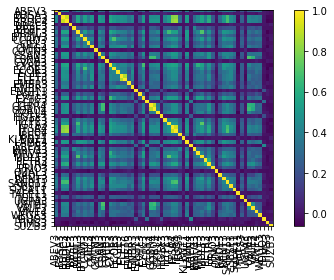

In [10]:
from pypfopt import plotting
plotting.plot_covariance(S, plot_correlation=True)

In [11]:
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('ABEV3', 0.0),
             ('B3SA3', 0.08581),
             ('BBDC3', 0.0),
             ('BBDC4', 0.0),
             ('BBSE3', 0.06893),
             ('BEEF3', 0.0),
             ('BRML3', 0.0),
             ('BTOW3', 0.0),
             ('CCRO3', 0.0),
             ('CIEL3', 0.0),
             ('CMIG4', 0.0),
             ('COGN3', 0.01637),
             ('CSAN3', 0.0),
             ('CSNA3', 0.0),
             ('CVCB3', 0.0),
             ('CYRE3', 0.0),
             ('ECOR3', 0.0),
             ('EGIE3', 0.0),
             ('ELET3', 0.0),
             ('ELET6', 0.0),
             ('EMBR3', 0.0),
             ('ENBR3', 0.0),
             ('ENGI11', 0.05758),
             ('EQTL3', 0.12088),
             ('EZTC3', 0.0),
             ('FLRY3', 0.03343),
             ('GGBR4', 0.0),
             ('GOAU4', 0.0),
             ('GOLL4', 0.0),
             ('HGTX3', 0.00163),
             ('HYPE3', 0.0),
             ('IGTA3', 0.0),
             ('ITSA4', 0.0),
             (

In [12]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} ticker have zero weight")

44/60 ticker have zero weight


In [13]:
ef.portfolio_performance(verbose=True)

Expected annual return: 22.3%
Annual volatility: 11.4%
Sharpe Ratio: 1.78


(0.22322702090551663, 0.11406246795863165, 1.7817168481679997)

Expected annual return: 21.5%
Annual volatility: 11.0%
Sharpe Ratio: 1.78


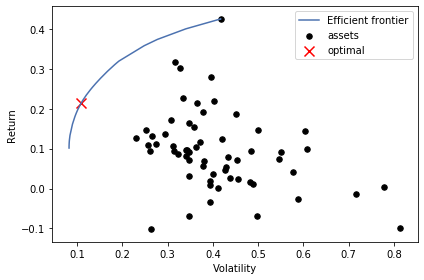

In [14]:
from pypfopt import CLA, plotting
cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True)
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [15]:
"""
We could have a portfolio with annual vol of 11.4% and expected annual return of 22.3%. 
It is possible to obtain a positive SR by defining portfolios with stocks that are part of the ibovespa index.
This output, despite interesting, is not useful in itself. Let's then convert it into an allocation that 
an investor could use to weight her own portfolio
"""


"\nWe could have a portfolio with annual vol of 11.4% and expected annual return of 22.3%. \nIt is possible to obtain a positive SR by defining portfolios with stocks that are part of the ibovespa index.\nThis output, despite interesting, is not useful in itself. Let's then convert it into an allocation that \nan investor could use to weight her own portfolio\n"

In [18]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation {'B3SA3': 153, 'BBSE3': 238, 'COGN3': 340, 'ENGI11': 125, 'EQTL3': 556, 'FLRY3': 127, 'HGTX3': 9, 'KLBN11': 341, 'LREN3': 206, 'QUAL3': 132, 'RADL3': 437, 'RENT3': 5, 'TAEE11': 361, 'UGPA3': 130, 'WEGE3': 171, 'YDUQ3': 12}
Funds remaining: $0.93


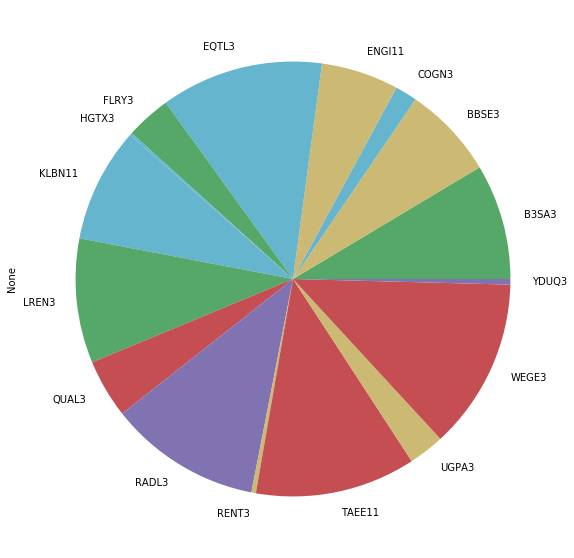

In [20]:
import pandas as pd
pd.Series(weights).plot.pie(figsize=(10,10))

In [21]:
"""
As we may check from the output, only part of the stocks compounding the Ibovespa index were selected to
be part of our SP maximised portfolio. Let's now conduct some exercises, obtaining other portfolios
for different risks. Let's remember that, according to the model for a long-only portfolio, the investor
would maximise the SP by taking 11.4% of expected risk, or volatility. What if the investor
is a risk-lover, and is willing to invest in a riskier portfolio to increase the odds of higher returns?
"""

"\nAs we may check from the output, only part of the stocks compounding the Ibovespa index were selected to\nbe part of our SP maximised portfolio. Let's now conduct some exercises, obtaining other portfolios\nfor different risks. Let's remember that, according to the model for a long-only portfolio, the investor\nwould maximise the SP by taking 11.4% of expected risk, or volatility. What if the investor\nis a risk-lover, and is willing to invest in a riskier portfolio to increase the odds of higher returns?\n"

In [22]:
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ABEV3', 0.0),
             ('B3SA3', 0.10557),
             ('BBDC3', 0.0),
             ('BBDC4', 0.0),
             ('BBSE3', 0.02258),
             ('BEEF3', 0.0),
             ('BRML3', 0.0),
             ('BTOW3', 0.0),
             ('CCRO3', 0.0),
             ('CIEL3', 0.0),
             ('CMIG4', 0.0),
             ('COGN3', 0.00113),
             ('CSAN3', 0.0),
             ('CSNA3', 0.0),
             ('CVCB3', 0.0),
             ('CYRE3', 0.0),
             ('ECOR3', 0.0),
             ('EGIE3', 0.0),
             ('ELET3', 0.0),
             ('ELET6', 0.0),
             ('EMBR3', 0.0),
             ('ENBR3', 0.0),
             ('ENGI11', 0.05122),
             ('EQTL3', 0.19646),
             ('EZTC3', 0.0),
             ('FLRY3', 0.0),
             ('GGBR4', 0.0),
             ('GOAU4', 0.0),
             ('GOLL4', 0.0),
             ('HGTX3', 0.0),
             ('HYPE3', 0.0),
             ('IGTA3', 0.0),
             ('ITSA4', 0.0),
             ('ITUB4',

In [23]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} ticker have zero weight")

48/60 ticker have zero weight


In [24]:
ef.portfolio_performance(verbose=True)

Expected annual return: 27.4%
Annual volatility: 15.0%
Sharpe Ratio: 1.69


(0.2740161037134685, 0.1500000003755906, 1.6934406871828538)

In [25]:
"""
Comparing this portfolio with 15% of risk, higher than the natural portfolio maximising the SP for the lowest 
level of risk, 11.4%, we may expect a higher return (27.4% vs 22.3%, respectively)
"""

'\nComparing this portfolio with 15% of risk, higher than the natural portfolio maximising the SP for the lowest \nlevel of risk, 11.4%, we may expect a higher return (27.4% vs 22.3%, respectively)\n'

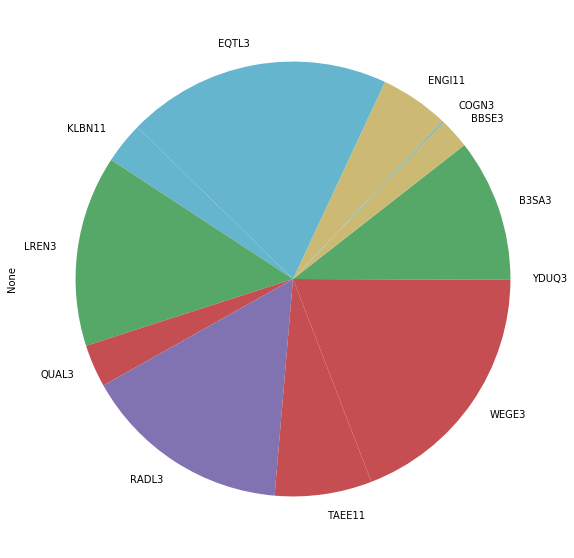

In [26]:
pd.Series(weights).plot.pie(figsize=(10,10))

In [27]:
"""
One interesting feature of this new portfolio is that, compared with the first, is being less benefited by 
diversification. Still, from 12 stocks were selected by the algorithm to be part of the portfolio.
We should also remember that this is a long-only portoflio. Let's simulate some other portfolios and check 
new possible outputs.
"""

"\nOne interesting feature of this new portfolio is that, compared with the first, is being less benefited by \ndiversification. Still, from 12 stocks were selected by the algorithm to be part of the portfolio.\nWe should also remember that this is a long-only portoflio. Let's simulate some other portfolios and check \nnew possible outputs.\n"

In [28]:
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.2)
weights = ef.clean_weights()
weights

OrderedDict([('ABEV3', 0.0),
             ('B3SA3', 0.08858),
             ('BBDC3', 0.0),
             ('BBDC4', 0.0),
             ('BBSE3', 0.0),
             ('BEEF3', 0.0),
             ('BRML3', 0.0),
             ('BTOW3', 0.0),
             ('CCRO3', 0.0),
             ('CIEL3', 0.0),
             ('CMIG4', 0.0),
             ('COGN3', 0.0),
             ('CSAN3', 0.0),
             ('CSNA3', 0.0),
             ('CVCB3', 0.0),
             ('CYRE3', 0.0),
             ('ECOR3', 0.0),
             ('EGIE3', 0.0),
             ('ELET3', 0.0),
             ('ELET6', 0.0),
             ('EMBR3', 0.0),
             ('ENBR3', 0.0),
             ('ENGI11', 0.0),
             ('EQTL3', 0.31689),
             ('EZTC3', 0.0),
             ('FLRY3', 0.0),
             ('GGBR4', 0.0),
             ('GOAU4', 0.0),
             ('GOLL4', 0.0),
             ('HGTX3', 0.0),
             ('HYPE3', 0.0),
             ('IGTA3', 0.0),
             ('ITSA4', 0.0),
             ('ITUB4', 0.0),
     

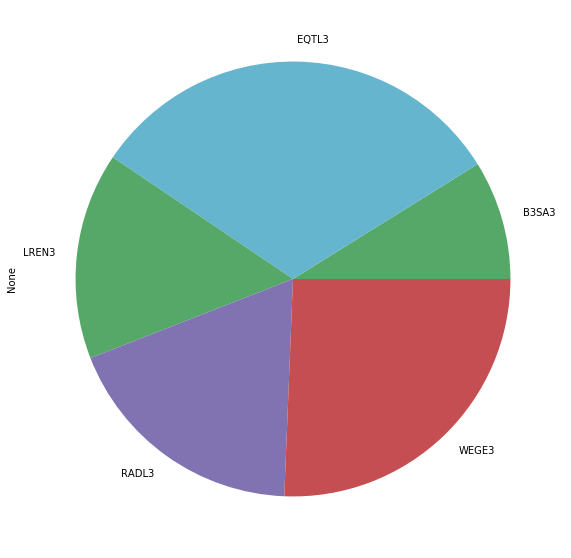

In [29]:
pd.Series(weights).plot.pie(figsize=(10,10))

In [30]:
ef.portfolio_performance(verbose=True)

Expected annual return: 32.6%
Annual volatility: 20.0%
Sharpe Ratio: 1.53


(0.32599140291391526, 0.19999999998158663, 1.5299570147104347)

In [31]:
"""
It is clearer that as we increase the portfolio's risk, odding to increase expected return, we also 
lose the diversification benefits and get more concentration as a result. We may use regression and penalization
to avoid that the optimiser overfits the data. We are likely to obtain better results by enforcing 
more diversification, if possible. L2 regularisation does that, let's simulate: 
"""

"\nIt is clearer that as we increase the portfolio's risk, odding to increase expected return, we also \nlose the diversification benefits and get more concentration as a result. We may use regression and penalization\nto avoid that the optimiser overfits the data. We are likely to obtain better results by enforcing \nmore diversification, if possible. L2 regularisation does that, let's simulate: \n"

In [32]:
from pypfopt import objective_functions
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=1)
ef.efficient_risk(0.2)
weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)
weights

Expected annual return: 25.6%
Annual volatility: 17.2%
Sharpe Ratio: 1.37


OrderedDict([('ABEV3', 0.01646),
             ('B3SA3', 0.05798),
             ('BBDC3', 0.0),
             ('BBDC4', 0.0),
             ('BBSE3', 0.00692),
             ('BEEF3', 0.0),
             ('BRML3', 0.0),
             ('BTOW3', 0.00064),
             ('CCRO3', 0.0),
             ('CIEL3', 0.0),
             ('CMIG4', 0.0),
             ('COGN3', 0.0),
             ('CSAN3', 0.03296),
             ('CSNA3', 0.0),
             ('CVCB3', 0.0),
             ('CYRE3', 0.0),
             ('ECOR3', 0.0),
             ('EGIE3', 0.02451),
             ('ELET3', 0.0),
             ('ELET6', 0.0),
             ('EMBR3', 0.0),
             ('ENBR3', 0.00421),
             ('ENGI11', 0.03606),
             ('EQTL3', 0.16344),
             ('EZTC3', 0.06096),
             ('FLRY3', 0.01929),
             ('GGBR4', 0.0),
             ('GOAU4', 0.0),
             ('GOLL4', 0.0),
             ('HGTX3', 0.02233),
             ('HYPE3', 0.0),
             ('IGTA3', 0.0),
             ('ITSA4', 

In [33]:
# let's now simulate the global-minimum variance (GMV) without providing the returns.
# we also apply the Leidoit Wolf method for covariance shrinkage. let's compare if the results will change:

In [34]:
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

/Users/Grilli/opt/anaconda3/lib/python3.7/site-packages/pypfopt/efficient_frontier.py:112: UserWarning: No expected returns provided. You may only use ef.min_volatility()
  "No expected returns provided. You may only use ef.min_volatility()"


OrderedDict([('ABEV3', 0.03024),
             ('B3SA3', 0.04789),
             ('BBDC3', -0.02973),
             ('BBDC4', 0.00989),
             ('BBSE3', 0.07834),
             ('BEEF3', 0.02175),
             ('BRML3', -0.00149),
             ('BTOW3', 0.00646),
             ('CCRO3', -0.0121),
             ('CIEL3', 0.00143),
             ('CMIG4', 0.0005),
             ('COGN3', 0.02324),
             ('CSAN3', 0.01195),
             ('CSNA3', -0.0129),
             ('CVCB3', 0.03398),
             ('CYRE3', -0.0043),
             ('ECOR3', 0.0042),
             ('EGIE3', 0.0616),
             ('ELET3', -0.01204),
             ('ELET6', 0.0107),
             ('EMBR3', 0.00488),
             ('ENBR3', 0.01636),
             ('ENGI11', 0.04299),
             ('EQTL3', 0.01222),
             ('EZTC3', -0.00776),
             ('FLRY3', 0.05412),
             ('GGBR4', 0.01153),
             ('GOAU4', -0.01589),
             ('GOLL4', -0.0075),
             ('HGTX3', 0.00691),
        

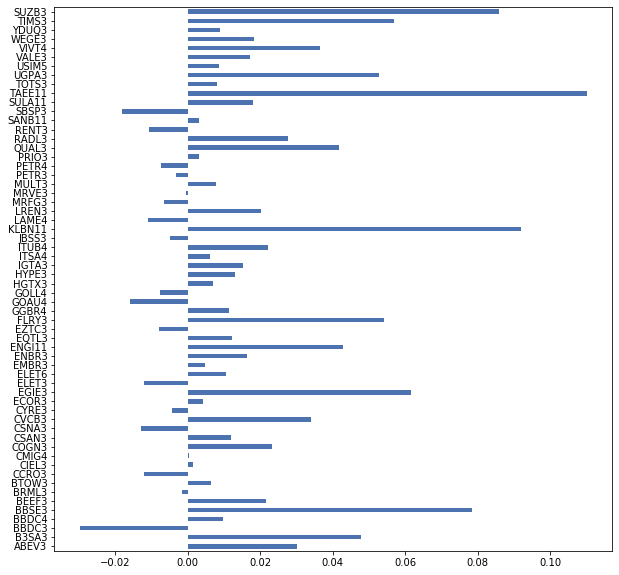

In [35]:
pd.Series(weights).plot.barh(figsize=(10,10))

In [36]:
ef.portfolio_performance(verbose=True)

Annual volatility: 8.2%


(None, 0.08187501986250184, None)

In [37]:
"""
The GMV portfolio provides us with a portfolio with 8.2% of risk. 
Let's simulate the allocation, considering an investor happy with this risk level and with
100000 Brazilian reais to invest in this portfolio.
"""

"\nThe GMV portfolio provides us with a portfolio with 8.2% of risk. \nLet's simulate the allocation, considering an investor happy with this risk level and with\n100000 Brazilian reais to invest in this portfolio.\n"

In [38]:
latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000, short_ratio=0.1)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with R${leftover:.2f} leftover")
alloc

Discrete allocation performed with R$1.50 leftover


{'ABEV3': 184,
 'B3SA3': 73,
 'BBDC4': 35,
 'BBSE3': 232,
 'BEEF3': 185,
 'BTOW3': 8,
 'CIEL3': 34,
 'CMIG4': 4,
 'COGN3': 416,
 'CSAN3': 13,
 'CVCB3': 160,
 'ECOR3': 30,
 'EGIE3': 124,
 'ELET6': 28,
 'EMBR3': 52,
 'ENBR3': 74,
 'ENGI11': 80,
 'EQTL3': 48,
 'FLRY3': 176,
 'GGBR4': 44,
 'HGTX3': 34,
 'HYPE3': 36,
 'IGTA3': 36,
 'ITSA4': 50,
 'ITUB4': 66,
 'KLBN11': 316,
 'LREN3': 39,
 'MULT3': 29,
 'PRIO3': 5,
 'QUAL3': 108,
 'RADL3': 91,
 'SANB11': 7,
 'SULA11': 36,
 'TAEE11': 286,
 'TOTS3': 26,
 'UGPA3': 222,
 'USIM5': 54,
 'VALE3': 19,
 'VIVT4': 72,
 'WEGE3': 21,
 'YDUQ3': 23,
 'TIMS3': 717,
 'SUZB3': 376,
 'BBDC3': -83,
 'BRML3': -9,
 'CCRO3': -56,
 'CSNA3': -33,
 'CYRE3': -9,
 'ELET3': -23,
 'EZTC3': -11,
 'GOAU4': -93,
 'GOLL4': -19,
 'JBSS3': -13,
 'LAME4': -28,
 'MRFG3': -26,
 'MRVE3': -1,
 'PETR3': -8,
 'PETR4': -17,
 'RENT3': -10,
 'SBSP3': -24}

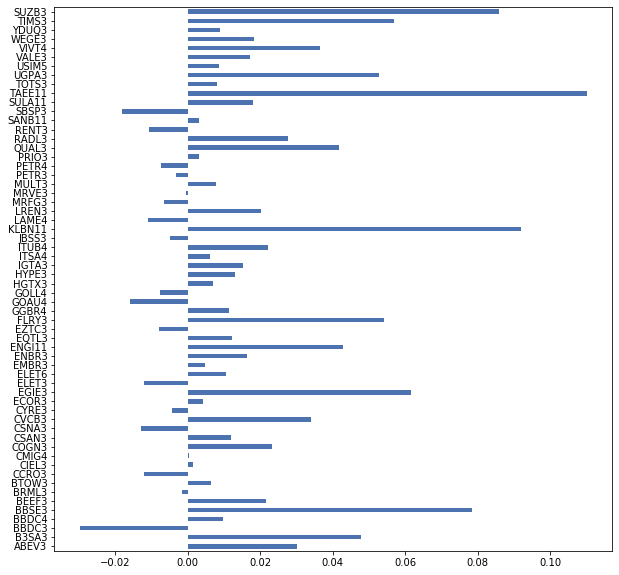

In [41]:
pd.Series(weights).plot.barh(figsize=(10,10))

In [42]:
ef.portfolio_performance(verbose=True)

Annual volatility: 8.2%


(None, 0.08187501986250184, None)

In [43]:
"""
Applying the GMV portfolio to a total of R$100,000.00, and a short ratio of 10% (R$10,000.00),
we may replicate the GMV portfolio. Comparing with the portfolios obtained with simple returns and covariances,
more assets are included, which may suggest that diversification benefits were achievable. Important to note 
again that we might only have as the output the GMV, we do not have expected returns. Let's proceed 
with the allocation
"""

"\nApplying the GMV portfolio to a total of R$100,000.00, and a short ratio of 10% (R$10,000.00),\nwe may replicate the GMV portfolio. Comparing with the portfolios obtained with simple returns and covariances,\nmore assets are included, which may suggest that diversification benefits were achievable. Important to note \nagain that we might only have as the output the GMV, we do not have expected returns. Let's proceed \nwith the allocation\n"

In [44]:
"""
Let's now do an exercise to find the Max SR adding sector constrints to our portfolio. 
"""

"\nLet's now do an exercise to find the Max SR adding sector constrints to our portfolio. \n"

In [47]:
sector_mapper = {
    "ABEV3": "Consumer Staples",
    "B3SA3": "Financials",
    "BBDC3": "Financials",
    "BBDC4": "Financials", 
    "BBSE3": "Financials", 
    "BEEF3": "Consumer Staples", 
    "BRML3": "Real Estate", 
    "BTOW3": "Consumer Discretionary",
    "CCRO3": "Industrials", 
    "CIEL3": "Tech",
    "CMIG4": "Utilities",
    "COGN3": "Consumer Discretionary",
    "CSAN3": "Oil & Gas",
    "CSNA3": "Materials",
    "CVCB3": "Consumer Discretionary",
    "CYRE3": "Real Estate",
    "ECOR3": "Industrials",
    "EGIE3": "Utilities",
    "ELET3": "Utilities",
    "ELET6": "Utilities", 
    "EMBR3": "Industrials",
    "ENBR3": "Utilities", 
    "ENGI11": "Utilities",
    "EQTL3": "Utilities", 
    "EZTC3": "Real Estate",
    "FLRY3": "Health Care",
    "GGBR4": "Materials",
    "GOAU4": "Materials", 
    "GOLL4": "Industrials",
    "HGTX3": "Consumer Discretionary",
    "HYPE3": "Pharma",
    "IGTA3": "Real Estate",
    "ITSA4": "Financials", 
    "ITUB4": "Financials", 
    "JBSS3": "Consumer Staples", 
    "KLBN11": "Pulp & Paper", 
    "LAME4": "Consumer Discretionary", 
    "LREN3": "Consumer Discretionary",
    "MRFG3": "Consumer Staples", 
    "MRVE3": "Consumer Discretionary",
    "MULT3": "Real Estate",
    "PETR3": "Oil & Gas", 
    "PETR4": "Oil & Gas", 
    "PRIO3": "Oil & Gas", 
    "QUAL3": "Industrials",
    "RADL3": "Healthcare", 
    "RENT3": "Consumer Discretionary", 
    "SANB11": "Financials", 
    "SBSP3": "Utilities", 
    "SULA11": "Financials", 
    "TAEE11": "Energy", 
    "TOTS3": "Tech", 
    "UGPA3": "Energy", 
    "USIM5": "Materials", 
    "VALE3": "Materials", 
    "VIVT4": "Communications", 
    "WEGE3": "Industrials", 
    "YDUQ3": "Consumer Discretionary",
    "TIMS3": "Communications", 
    "SUZB3": "Pulp & Paper"
}

sector_lower = {
    "Energy": 0.02,
    "Pulp & Paper": 0.02,
}

sector_upper = { 
    "Consumer Discretionary": 0.2,
    "Financials": 0.3,
}

In [55]:
# we could use the above sector dictionary to bound the weights of sectors in the portfolio, which will not
# be done here. Let's again try to target our volatility at 15%

In [51]:
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ABEV3', 0.0),
             ('B3SA3', 0.10525),
             ('BBDC3', 0.0),
             ('BBDC4', 0.0),
             ('BBSE3', 0.02398),
             ('BEEF3', 0.0),
             ('BRML3', 0.0),
             ('BTOW3', 0.0),
             ('CCRO3', 0.0),
             ('CIEL3', 0.0),
             ('CMIG4', 0.0),
             ('COGN3', 0.00172),
             ('CSAN3', 0.0),
             ('CSNA3', 0.0),
             ('CVCB3', 0.0),
             ('CYRE3', 0.0),
             ('ECOR3', 0.0),
             ('EGIE3', 0.0),
             ('ELET3', 0.0),
             ('ELET6', 0.0),
             ('EMBR3', 0.0),
             ('ENBR3', 0.0),
             ('ENGI11', 0.05273),
             ('EQTL3', 0.19709),
             ('EZTC3', 0.0),
             ('FLRY3', 0.0),
             ('GGBR4', 0.0),
             ('GOAU4', 0.0),
             ('GOLL4', 0.0),
             ('HGTX3', 0.0),
             ('HYPE3', 0.0),
             ('IGTA3', 0.0),
             ('ITSA4', 0.0),
             ('ITUB4',

In [52]:
num_small = len([k for k in weights if weights[k] <= 1.e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

47/60 tickers have zero weight


In [53]:
ef.portfolio_performance(verbose=True)

Expected annual return: 27.4%
Annual volatility: 15.0%
Sharpe Ratio: 1.69


(0.27360289912159336, 0.15000000189095078, 1.6906859728305959)

In [56]:
"""
Once again, many of the possible assets to that potentially could be part of our portfolio were ignored, and an investor 
may be worried about few diversification. Let's enforce some level of diversification with L2 regularisation. 
"""

"\nOnce again, many of the possible assets to that potentially could be part of our portfolio were ignored, and an investor \nmay be worried about few diversification. Let's enforce some level of diversification with L2 regularisation. \n"

In [57]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=1)
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ABEV3', 0.01671),
             ('B3SA3', 0.06504),
             ('BBDC3', 0.0),
             ('BBDC4', 0.0),
             ('BBSE3', 0.02138),
             ('BEEF3', 0.0),
             ('BRML3', 0.0),
             ('BTOW3', 0.0),
             ('CCRO3', 0.0),
             ('CIEL3', 0.0),
             ('CMIG4', 0.0),
             ('COGN3', 0.01066),
             ('CSAN3', 0.02556),
             ('CSNA3', 0.0),
             ('CVCB3', 0.0),
             ('CYRE3', 0.0),
             ('ECOR3', 0.0),
             ('EGIE3', 0.02469),
             ('ELET3', 0.0),
             ('ELET6', 0.0),
             ('EMBR3', 0.0),
             ('ENBR3', 0.00227),
             ('ENGI11', 0.04405),
             ('EQTL3', 0.14539),
             ('EZTC3', 0.04582),
             ('FLRY3', 0.02781),
             ('GGBR4', 0.0),
             ('GOAU4', 0.0),
             ('GOLL4', 0.0),
             ('HGTX3', 0.02424),
             ('HYPE3', 0.0),
             ('IGTA3', 0.0),
             ('ITSA4', 

In [58]:
num_small = len([k for k in weights if weights[k] <= 1.e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

35/60 tickers have zero weight


In [59]:
# as expected, more assets were attributed weights != 0, which brings us more diversification. 

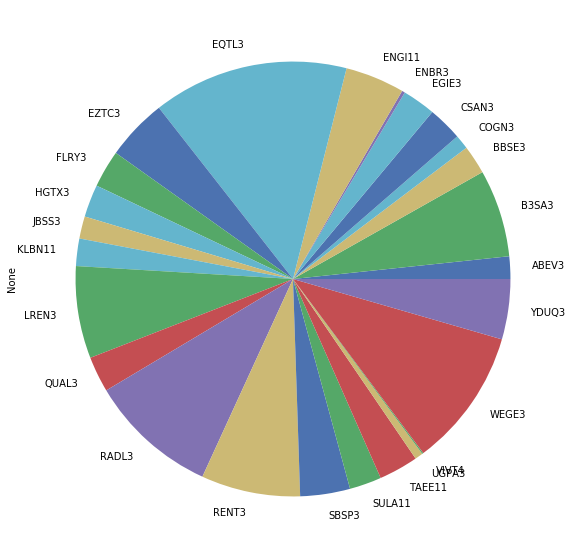

In [60]:
pd.Series(weights).plot.pie(figsize=(10, 10))

In [61]:
ef.portfolio_performance(verbose=True)

Expected annual return: 24.4%
Annual volatility: 15.0%
Sharpe Ratio: 1.49


(0.2437845048596976, 0.15000000075172354, 1.491896691588025)

In [63]:
"""

Let's now work with the assumption that we have a required rate of return, such as an investor to retire, 
or the actuarial level necessary to cover the liabilities of a pension fund or scheme. We also suppose 
our portfolio to be market neutral, equally exposed to long and short positions. 

"""

"\n\nLet's now work with the assumption that we have a required rate of return, such as an investor to retire, \nor the actuarial level necessary to cover the liabilities of a pension fund or scheme. We also suppose \nour portfolio to be market neutral, equally exposed to long and short positions. \n\n"

In [71]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.15, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('ABEV3', 0.00901),
             ('B3SA3', 0.02978),
             ('BBDC3', 0.00123),
             ('BBDC4', 0.00105),
             ('BBSE3', 0.00131),
             ('BEEF3', -0.01116),
             ('BRML3', -0.02562),
             ('BTOW3', 0.00202),
             ('CCRO3', -0.00714),
             ('CIEL3', -0.02334),
             ('CMIG4', -0.01215),
             ('COGN3', -0.0046),
             ('CSAN3', 0.02118),
             ('CSNA3', -0.00301),
             ('CVCB3', -0.02304),
             ('CYRE3', -0.01112),
             ('ECOR3', -0.01783),
             ('EGIE3', 0.01265),
             ('ELET3', -0.00384),
             ('ELET6', 0.00157),
             ('EMBR3', -0.03601),
             ('ENBR3', 0.00113),
             ('ENGI11', 0.01627),
             ('EQTL3', 0.08926),
             ('EZTC3', 0.03676),
             ('FLRY3', 0.0063),
             ('GGBR4', -0.01117),
             ('GOAU4', -0.03847),
             ('GOLL4', -0.02017),
             ('HGTX3', 0.0069

In [72]:
ef.portfolio_performance(verbose=True)

Expected annual return: 15.0%
Annual volatility: 8.5%
Sharpe Ratio: 1.54


(0.15000000000000002, 0.08463685873299147, 1.5359738292050529)

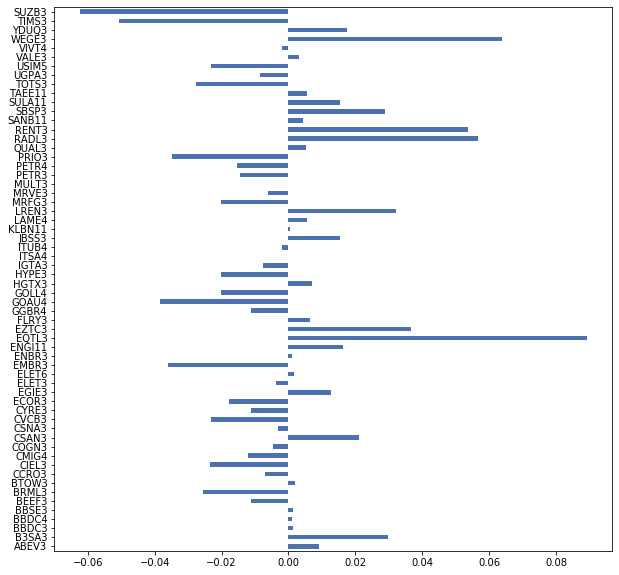

In [73]:
pd.Series(weights).plot.barh(figsize=(10,10))

In [74]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: -0.00


In [77]:
# now, simulate yourself and let me know your best theoretical portfolio according to your personal risk tolerance.